<h2> <center> Fraud Detection in Transaction </center> </h2>

- Author Name: Moin Khan

### Introduction
Fraud detection is a crucial task in financial systems. With the rise of digital transactions, fraudulent activities have also increased, making it essential to build models that can effectively detect and prevent fraud. Detecting fraud early helps in reducing financial loss and ensuring the trust of customers in banking and payment systems.

### Fraud and Its Types
Fraud generally refers to wrongful or criminal deception intended to result in financial or personal gain. In the financial sector, fraud can be of several types:

- **Transaction Fraud**: Unauthorized or suspicious transfers of money.
- **Identity Theft**: Using stolen credentials to perform illegal activities.
- **Phishing Scams**: Deceiving users to share sensitive information.
- **Account Takeover**: Fraudsters gain control of customer accounts.
- **Money Laundering**: Concealing the origins of illegally obtained money.

### What is PaySim?
PaySim is a financial transaction simulator designed to replicate real-world mobile money transaction behavior. It was developed using aggregated data from actual transactions and is often used in research to study fraud detection systems. The dataset generated by PaySim includes different transaction types such as **CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER**, along with fraud indicators. Researchers use this dataset to build and test machine learning models that can differentiate between fraudulent and non-fraudulent transactions.

### Data Variables in our Dataset (PaySim)

The PaySim dataset simulates real-world mobile money transactions. It contains several important variables:

- **step**: Unit of time in hours (1 step = 1 hour). The dataset spans 744 steps (30 days).  
- **type**: Transaction type, such as *CASH-IN, CASH-OUT, DEBIT, PAYMENT,* and *TRANSFER*.  
- **amount**: The transaction amount in local currency.  
- **nameOrig**: Customer initiating the transaction.  
- **oldbalanceOrg**: Initial balance of the origin account before the transaction.  
- **newbalanceOrig**: Balance of the origin account after the transaction.  
- **nameDest**: Customer receiving the transaction.  
- **oldbalanceDest**: Initial balance of the destination account before the transaction.  
- **newbalanceDest**: Balance of the destination account after the transaction.  
- **isFraud**: Indicates whether the transaction is fraudulent (1 = Fraud, 0 = Not Fraud).  
- **isFlaggedFraud**: Marks illegal attempts such as transfers above 200,000 units in a single transaction.  

These variables together help in understanding transaction behavior and detecting fraudulent activities.


In [1]:
# setting up work environment 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

##### EDA

In [2]:
# reading our data set with the help of pandas read_csv function

df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# The Shape Function is use to get the number of rows x coloumns present in our Data set
df.shape

(6362620, 11)

In [4]:
#let's understand each data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
#counting the number of duplicate rows

duplicate_counts = df.duplicated(keep='first').sum() # The keep='first' here means keep the first occurence and don't count it under duplicates
print(duplicate_counts)

0


In [6]:
#creating a Function to count number of null values, creating function is a good habit because if null's are present we don't need to write the code again and again to know the current null status

def nan_val(df) -> int:
   return df.isna().sum()

nan_val(df)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# let's describe our data for quick eda
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Since our Rows are above 6m with 11 features we should try to reduce the size of data

cleaned_df=df.copy() #making a copy of df so that we can remove outliers easily

In [9]:
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    mask = (cleaned_df[col] >= lower_fence) & (cleaned_df[col] <= upper_fence)
    cleaned_df = cleaned_df[mask]

cleaned_df.reset_index(drop=True, inplace=True)

#we basically remove the outliers 

In [10]:
# Let's see our Reduced size

print(f'original shape: {df.shape} \nAfter Cleaning outliers: {cleaned_df.shape}')

original shape: (6362620, 11) 
After Cleaning outliers: (3251409, 11)


! Oh no the Data becomes half it's not that good because we are loosing important features.

* The above method may work for other dataset but for financial, healtcare diagnosis etc. datasets the outliers are key factors to catch frauds, or irregular patterns, so we will    keep the rows just scale the values so that they won't go much extreme.
* We ususally Don't be bother about outliers here as they represent unusual transaction so it's better to leave the df like this.
* More over the Dataset has no Duplicates as Well as Null values so we can conlude that Data is much Cleaner.

In [11]:
#let's count normal transactions and Fraud Transaction 

normal_trans=df[df['isFraud']==0].shape[0]
fraud_trans=df[df['isFraud']==1].shape[0]

In [12]:
#let's count foreach payment type

trans_ptype = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
trans_ptype.head()

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


*from above we can conclude that only Transfer and Cashout contains Fraud values 

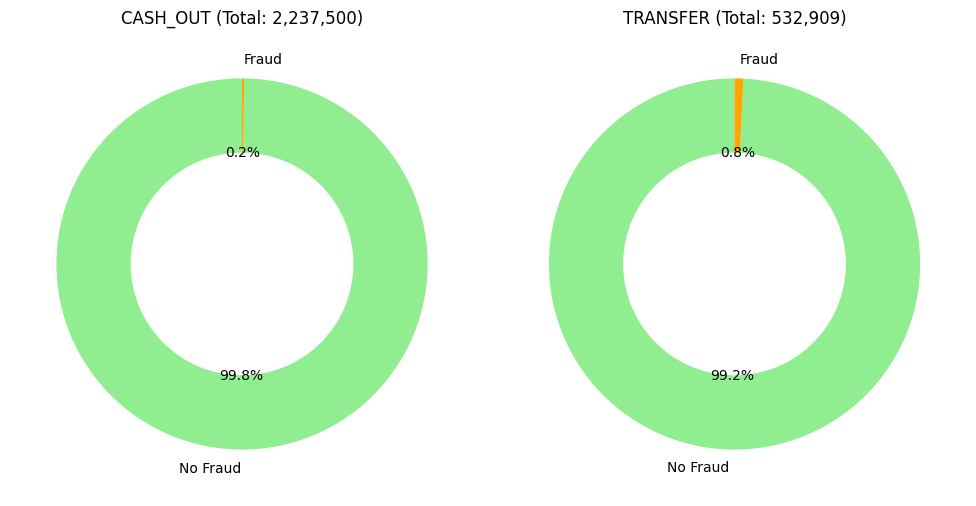

In [13]:
#Let's understand the fraud presence in each transfer and cashout visually for better understanding

trans_ptype=trans_ptype[trans_ptype[1]>0]
n_types=len(trans_ptype.index)
fig, axes=plt.subplots(1, n_types, figsize=(5*n_types,5))

if n_types == 1:
    axes = [axes]

for ax, (t, row) in zip(axes, trans_ptype.iterrows()):
    row.plot.pie(
        ax=ax,
        autopct='%1.1f%%',
        startangle=90,
        labels=['No Fraud', 'Fraud'],
        colors=['lightgreen', 'orange'],
        legend=False,
        wedgeprops=dict(width=0.4)
    )
    ax.set_title(f"{t} (Total: {row.sum():,})")
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

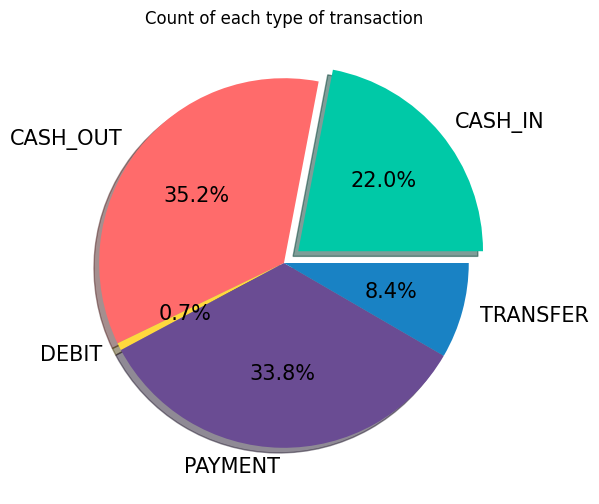

In [14]:
#let's get each payment type Share in Transactions

cnt=df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(cnt, labels = cnt.index, autopct = "%1.1f%%", colors = ["#00C9A7", "#FF6B6B", "#FFD93D", "#6A4C93", "#1982C4"], shadow = True, explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = '200', fontsize = 12)
plt.show()

* From the above pie we can say that Cash_Out and Payment are One of the major transaction type
* Our earlier ring chart shows that only Transfer and Cash_Out contains fraudlent Transactions 
* where cash_out accounts for just 0.2% of fraud the Transfer accounts the most fraudlent transactions e.g. 0.8% despite being so less used e.g. 8.4% out of all types
* Which means The most frauds occur when the type is Transfer 

In [15]:
# we need more strandarized value of each numerical cols so let's do it using log tranformation, Doing this because it will help us to identify correlation between variables

df['amount_log'] = np.log1p(df['amount'])
df['oldbalanceOrg_log'] = np.log1p(df['oldbalanceOrg'])
df['oldbalanceDest']=np.log1p(df['oldbalanceDest'])
df['newbalanceDest']=np.log1p(df['newbalanceDest'])
df['newbalanceOrig']=np.log1p(df['newbalanceOrig'])


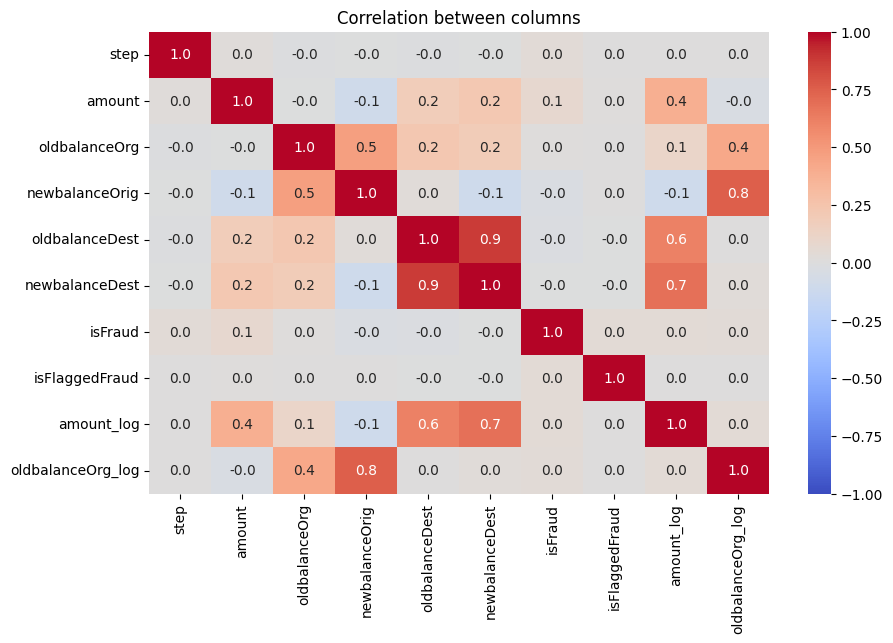

In [16]:
# lets see the correlation between each type in numerical cols
# we are using heatmap

plt.figure(figsize=(10,6))
plt.title('Correlation between columns')

num_df = df.select_dtypes(include=['int', 'float']) #Selecting only Numerical value because corr does not work over Categorial or obejct data

corre=num_df.corr()

sns.heatmap(
   corre,
   cmap='coolwarm',
   annot=True,
   fmt='0.1f',
   vmin=-1, vmax=1
)

plt.show()

- From the above histplot we can conclude that our data has high multicolinearity between columns
- we can remove cols -> oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest,amount log, oldbalanceOrg_log
- Ther's a Catch too if we remove all these cols we are making our data to less
- Let's keep newbalanceOrig, oldbalanceOrg, they have 0.5 colinearity between each other, it's bearable

In [17]:
#let's Drop the columns 

new_df=df.drop(['oldbalanceDest', 'newbalanceDest','amount_log', 'oldbalanceOrg_log', 'isFlaggedFraud'], axis=1)

In [18]:
new_df.head() #first five table rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,11.984786,M1979787155,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,9.872292,M2044282225,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.000000,C553264065,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.000000,C38997010,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,10.305174,M1230701703,0


* we can drop out static string columns which may not be so much helpful in our Prediction and modelling.
* columns ['nameOrig', 'nameDest']

In [19]:
new_df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [20]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1,PAYMENT,9839.64,170136.0,11.984786,0
1,1,PAYMENT,1864.28,21249.0,9.872292,0
2,1,TRANSFER,181.00,181.0,0.000000,1
3,1,CASH_OUT,181.00,181.0,0.000000,1
4,1,PAYMENT,11668.14,41554.0,10.305174,0


In [21]:
new_df.shape

(6362620, 6)

* well our data now looks small with less features, making it less complex, we are good to go

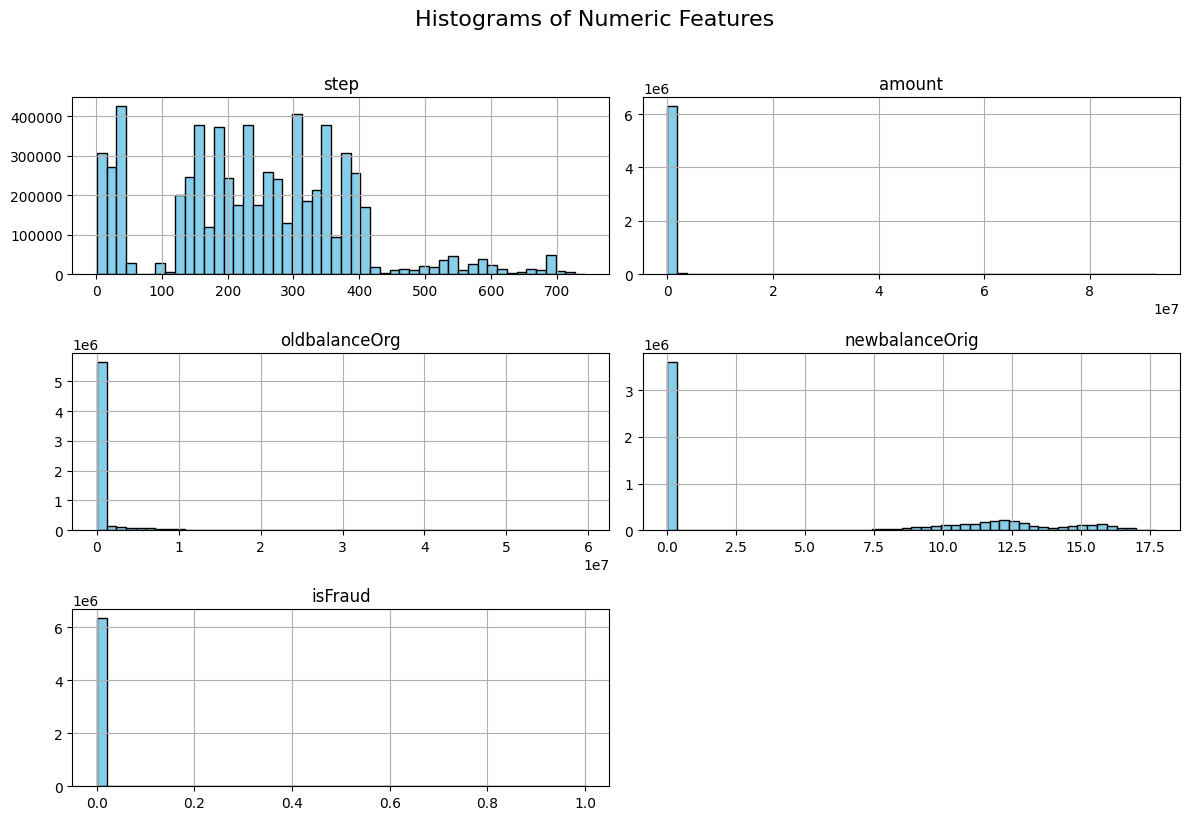

In [22]:
# Let's see the spreadness of our each Numerical columns using histplot
new_df.hist(
    bins=50, 
    figsize=(12,8), 
    color="skyblue",
    edgecolor="black"
)

plt.suptitle("Histograms of Numeric Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Class distribution:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraud %: 0.129 %


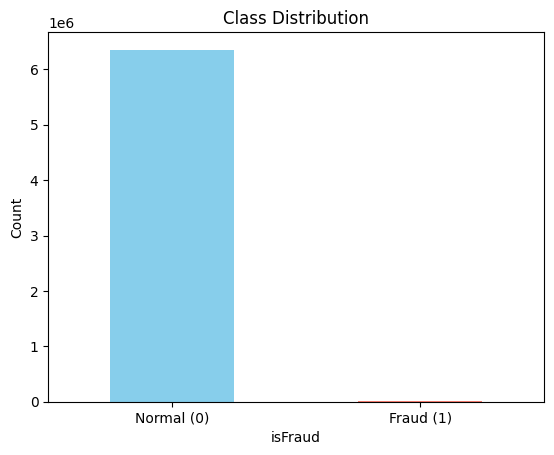

In [23]:
# Let's check weather our dataset is balanced or not as it necessary for categorical classification models

class_counts = new_df['isFraud'].value_counts()

print("Class distribution:\n", class_counts)
print("\nFraud %:", round(class_counts[1] / class_counts.sum() * 100, 3), "%")

# Bar chart
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0,1], ['Normal (0)', 'Fraud (1)'], rotation=0)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()

* The Above Graph and Calculation shows that our data is too imbalanced, well it's expected
* Let's try to make it less imbalance

In [24]:
# Let's Make our Data Balance 

fraud = new_df[new_df['isFraud'] == 1]
normal = new_df[new_df['isFraud'] == 0]

# Taking a stratified sample of 20k normals (preserving transaction type distribution) which is acceptable as compared to 6M+ becuase we have just 8.2k Frauds
normal_sample = normal.groupby('type', group_keys=False).apply(
    lambda x: x.sample(frac=20001/len(normal), random_state=42)
)

# Combine fraud + sampled normals
balanced_df = pd.concat([fraud, normal_sample], ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['isFraud'].value_counts())

isFraud
0    20000
1     8213
Name: count, dtype: int64


In [25]:
balanced_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,163,CASH_OUT,175744.09,0.00,0.000000,0
1,329,CASH_IN,198498.14,1179.00,12.204462,0
2,180,PAYMENT,21188.48,41936.00,9.940230,0
3,13,PAYMENT,1573.44,208511.01,12.240177,0
4,346,PAYMENT,48968.89,0.00,0.000000,0


##### Let's start our Machine Model Training

In [26]:
# encoding categorial payment type column

dummy = pd.get_dummies(balanced_df['type']).astype(int)

final_df=pd.concat([balanced_df, dummy], axis='columns')

final_df.drop(['type'], axis=1, inplace=True)

final_df.describe(include='all')

,step,amount,oldbalanceOrg,newbalanceOrig,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,28213.000000,2.821300e+04,2.821300e+04,28213.000000,28213.000000,28213.000000,28213.000000,28213.000000,28213.000000,28213.000000
mean,279.327828,5.498884e+05,1.055800e+06,3.905498,0.291107,0.156098,0.395066,0.004608,0.240031,0.204197
std,176.174357,1.477756e+06,3.084384e+06,5.915846,0.454281,0.362955,0.488874,0.067725,0.427110,0.403120
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159.000000,2.124781e+04,2.200000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,260.000000,1.251536e+05,4.963000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,376.000000,3.324054e+05,4.249629e+05,10.526715,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,743.000000,2.104715e+07,5.958504e+07,17.719200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Encoding is necessary because ML models won't over String Data, so we are using one hot encoding to encode our types as either 0 or 1
* Where 0 represent type not used and 1 represents the type is used

In [27]:
final_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,163,175744.09,0.00,0.000000,0,0,1,0,0,0
1,329,198498.14,1179.00,12.204462,0,1,0,0,0,0
2,180,21188.48,41936.00,9.940230,0,0,0,0,1,0
3,13,1573.44,208511.01,12.240177,0,0,0,0,1,0
4,346,48968.89,0.00,0.000000,0,0,0,0,1,0


In [28]:
# we must calculate the original error, we are doing this so that our model should not rely heavily over the other three specially amount
final_df["original_error"] = final_df["oldbalanceOrg"] - final_df["newbalanceOrig"] - final_df["amount"]
final_df.drop(['newbalanceOrig', 'oldbalanceOrg'], axis=1, inplace=True)

In [29]:
final_df.head()

,step,amount,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,original_error
0,163,175744.09,0,0,1,0,0,0,-175744.090000
1,329,198498.14,0,1,0,0,0,0,-197331.344462
2,180,21188.48,0,0,0,0,1,0,20737.579770
3,13,1573.44,0,0,0,0,1,0,206925.329823
4,346,48968.89,0,0,0,0,1,0,-48968.890000


* So as we know so far that our normal or non fraud values are almost doubles the fraud values and only Transfer and CashOut contains Fraud values.
* So in order to keep away our model from getting biased towards Normal Values we are Forcing it to respect and recognize our Fraud Values

In [30]:
final_df["is_transfer_or_cashout"] = final_df["TRANSFER"] | final_df["CASH_OUT"]
final_df.head()

,step,amount,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,original_error,is_transfer_or_cashout
0,163,175744.09,0,0,1,0,0,0,-175744.090000,1
1,329,198498.14,0,1,0,0,0,0,-197331.344462,0
2,180,21188.48,0,0,0,0,1,0,20737.579770,0
3,13,1573.44,0,0,0,0,1,0,206925.329823,0
4,346,48968.89,0,0,0,0,1,0,-48968.890000,0


In [31]:
# these columns are calculated for the same above reason, which is to prevent biasness and setting certain rules to help model recognize the Frauds quickly

final_df["fraud_prone"] = ((final_df["TRANSFER"] == 1) | (final_df["CASH_OUT"] == 1)).astype(int)
final_df["transfer_high_amount"] = (final_df["TRANSFER"] & (final_df["amount"] > 200000)).astype(int)

In [32]:
final_df.to_csv('final_df.csv', index=False ) # Just making an output of cleaned and dimensionally reduced csv

In [33]:
X=final_df.drop(['step','isFraud'], axis=1) #our Input Values 
y=final_df['isFraud'] # Our Target

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # scaling the values for fast computation and less skewness
X=scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y) # spliting and Testing the models

In [36]:
model_log=LogisticRegression().fit(X_train, y_train) # creating logistic model and fiting it! 

In [37]:
model_log.score(X_test, y_test) # overall accuracy score

0.9100897920604915

* Let's Visualize our our Model False Positive and False Negatives using Confusion Matrix

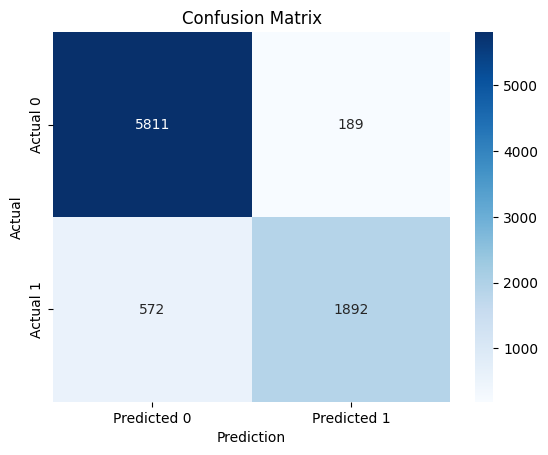

In [38]:
y_pred=model_log.predict(X_test)

cm= confusion_matrix(y_test, y_pred)
clr= classification_report(y_test, y_pred, output_dict=True)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

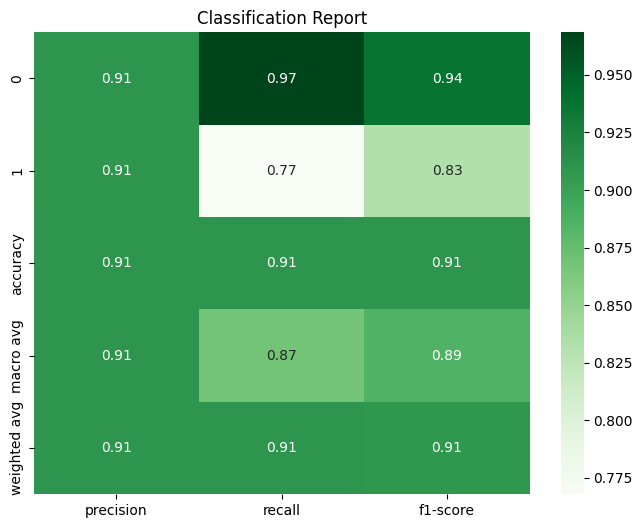

In [39]:
df_report = pd.DataFrame(clr).transpose() # making a df for classification report

df_plot = df_report.drop(columns=['support'], errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(df_plot, annot=True, cmap='Greens', fmt='.2f')

plt.title('Classification Report')
plt.show()

In [40]:
# Let's Print the simple values

#Logistic Regression metrics 

accuracy_lr= accuracy_score(y_test, y_pred)

precision_lr = precision_score(y_test, y_pred)

recall_lr = recall_score(y_test, y_pred)

clr_lr = classification_report(y_test, y_pred)

print(f"Accuracy of Logistic {accuracy_lr}")
print(f"Precision of Logistic {precision_lr}")
print(f"Recall of Logistic {recall_lr}")
print(f"Classification Report of Logistic\n {clr_lr}")

Accuracy of Logistic 0.9100897920604915
Precision of Logistic 0.9091782796732341
Recall of Logistic 0.7678571428571429
Classification Report of Logistic
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      6000
           1       0.91      0.77      0.83      2464

    accuracy                           0.91      8464
   macro avg       0.91      0.87      0.89      8464
weighted avg       0.91      0.91      0.91      8464



* Looking down to Classification report and Confusion matrix we can say that our Logistic model is not working that good
* Although the Accuracy and Precision is High, In certain application like Fraud Detection we may lok for Recall score which is average in the Logistic Case e.g. 80%
* As expected from Logistic beacause it assumes linearity

In [41]:
# Let's Use our Random Forest Classifier

rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=60          
)

rf_tuned.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
rf_pred=rf_tuned.predict(X_test)

In [43]:
accuracy_rf_tuned = accuracy_score(y_test, rf_pred)

precision_rf_tuned = precision_score(y_test, rf_pred)

recall_rf_tuned = recall_score(y_test, rf_pred)

clr_rf_tuned = classification_report(y_test, rf_pred)

print(f"Accuracy of Tuned Rf Tree {accuracy_rf_tuned}")
print(f"Precision of Tuned Rf Tree {precision_rf_tuned}")
print(f"Recall of Tuned Rf Tree {recall_rf_tuned}")
print(f"Classification Report of Tuned Rf Tree\n {clr_rf_tuned}")

Accuracy of Tuned Rf Tree 0.9992911153119093
Precision of Tuned Rf Tree 0.9995934959349594
Recall of Tuned Rf Tree 0.9979707792207793
Classification Report of Tuned Rf Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      2464

    accuracy                           1.00      8464
   macro avg       1.00      1.00      1.00      8464
weighted avg       1.00      1.00      1.00      8464



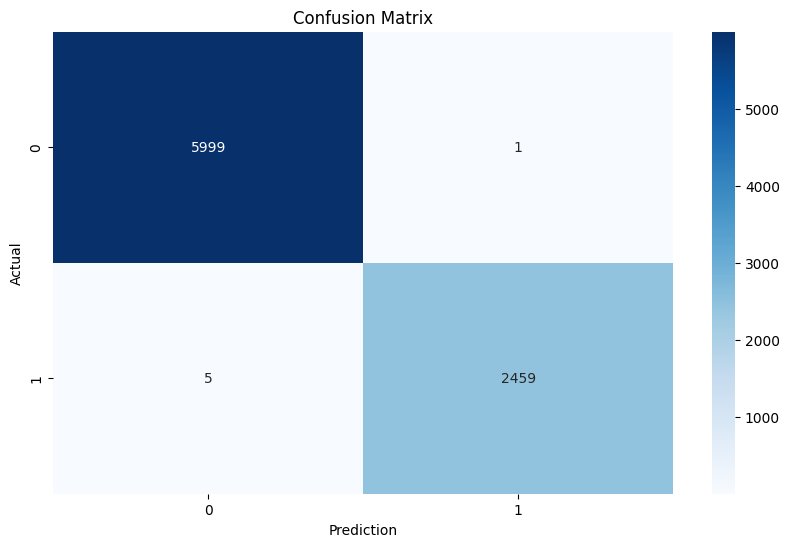

In [44]:
cm_rf=confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(10,6))
plt.title('CM for Random Forest', loc='center')
sns.heatmap(
   cm_rf,
   annot=True,
   fmt='d',
   cmap='Blues'
)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* After Analysing the above CM plot for Random Forest and Classification report we can conclude that the Random forest Genralise the Prediction well.
* With Accuracy, Precion, Recall Being 99% each, we can say that it is catching the Frauds well and good withou too much or negligible False alarams.
* As a Baseline We Can Use This Model.

In [45]:
# Let's try with our svm hyperplaner model

sv=SVC(kernel='poly', random_state=42, max_iter=1000, gamma='auto')
sv.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [46]:
sv_pred=sv.predict(X_test)

In [47]:
accuracy_sv= accuracy_score(y_test, sv_pred)

precision_sv = precision_score(y_test, sv_pred)

recall_sv = recall_score(y_test, sv_pred)

clr_sv = classification_report(y_test, sv_pred)

print(f"Accuracy of SVM {accuracy_sv}")
print(f"Precision of SVM {precision_sv}")
print(f"Recall of SVM {recall_sv}")
print(f"Classification Report of SVM\n {clr_sv}")

Accuracy of SVM 0.2938327032136106
Precision of SVM 0.29166172458783063
Recall of SVM 0.9979707792207793
Classification Report of SVM
               precision    recall  f1-score   support

           0       0.85      0.00      0.01      6000
           1       0.29      1.00      0.45      2464

    accuracy                           0.29      8464
   macro avg       0.57      0.50      0.23      8464
weighted avg       0.69      0.29      0.14      8464



  * The SVM  looks completely useless here, as expected beacause we have to odd values which lead to the SVM strugling
  * It's basically marking each and Every transaction is Fraud, Recall 1 or 100%
  * We should Discard this 

* Let's Try XgBoost, Though we got our best model with near perfect metrics still we should try XgBoost because it proves to be the best for imbalanced datasets

In [48]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric="auc"
)

xgb.fit(X_train, y_train)

y_pred_proba = xgb.predict_proba(X_test)[:, 1]
xg_pred = (y_pred_proba > 0.6).astype(int)


# Metrics
print("Accuracy:", accuracy_score(y_test, xg_pred))
print("Precision:", precision_score(y_test, xg_pred))
print("Recall:", recall_score(y_test, xg_pred))
print(f'roc_auc_score: {roc_auc_score(y_test, y_pred_proba)}')
print("\nClassification Report:\n", classification_report(y_test, xg_pred))

Accuracy: 0.9992911153119093
Precision: 0.9995934959349594
Recall: 0.9979707792207793
roc_auc_score: 0.999716856060606

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      2464

    accuracy                           1.00      8464
   macro avg       1.00      1.00      1.00      8464
weighted avg       1.00      1.00      1.00      8464



* As we can See it's Just near Perfect
* Best Model to use along with Random Forest

- Let's Compare our Each Model Metrics to decide which is Best 

In [49]:
performance_df = pd.DataFrame({
    'models' : ['Logistic Regression', 'Random Forest', 'SVM', 'XG-Boost'],
    'accuracy' : [accuracy_lr, accuracy_rf_tuned, accuracy_sv, accuracy_score(y_test, xg_pred)],
    'precision' : [precision_lr, precision_rf_tuned, precision_sv,precision_score(y_test, xg_pred)],
    'recall' : [recall_lr, recall_rf_tuned, recall_sv, recall_score(y_test, xg_pred)]
})
performance_df

,models,accuracy,precision,recall
0,Logistic Regression,0.910090,0.909178,0.767857
1,Random Forest,0.999291,0.999593,0.997971
2,SVM,0.293833,0.291662,0.997971
3,XG-Boost,0.999291,0.999593,0.997971


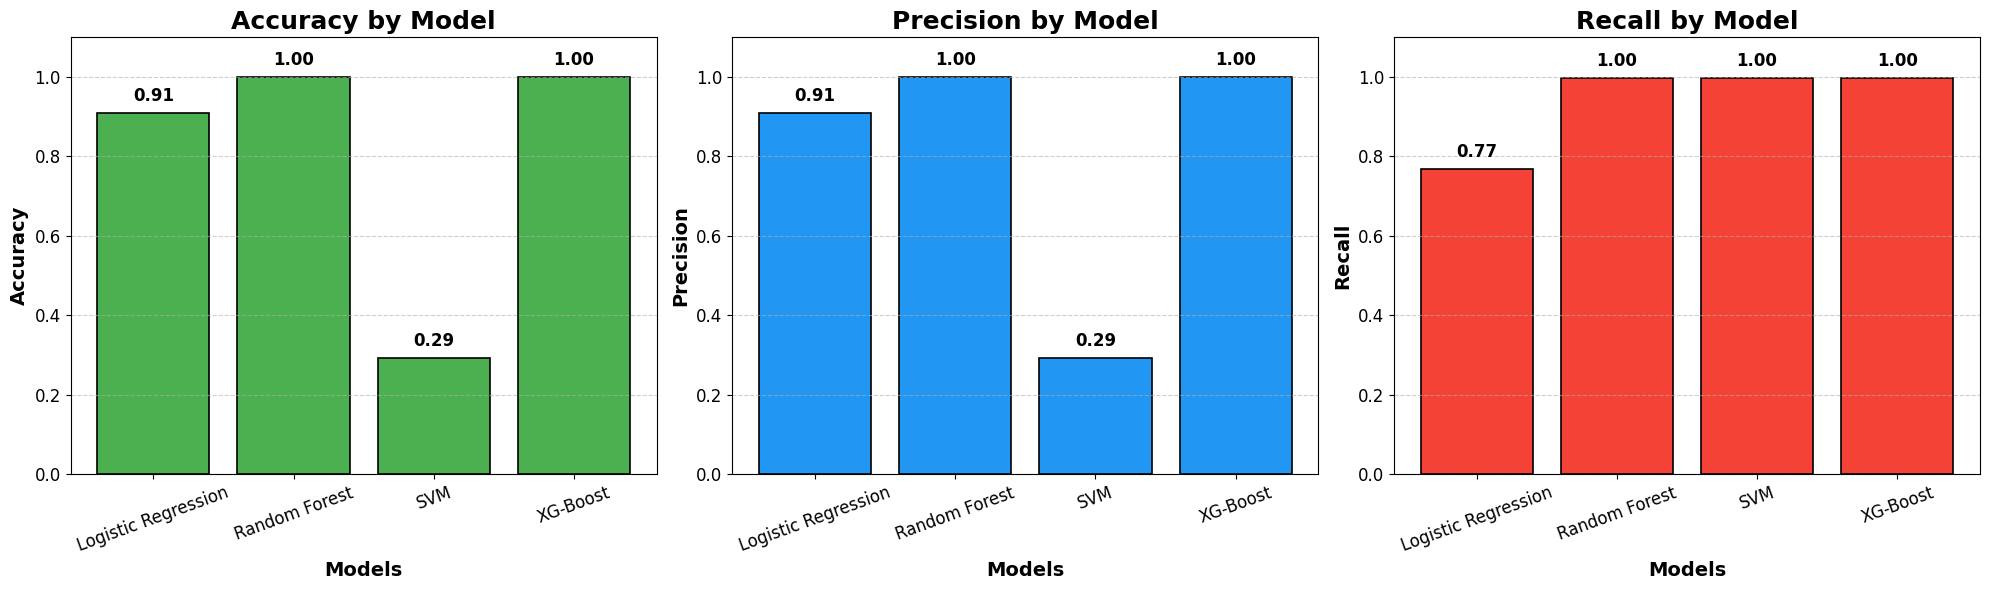

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
metrics = ['accuracy', 'precision', 'recall']
colors = ['#4CAF50', '#2196F3', '#F44336']

for i, metric in enumerate(metrics):
    bars = ax[i].bar(performance_df['models'], performance_df[metric], 
                     color=colors[i], edgecolor='black', linewidth=1.2)
    
    ax[i].set_xlabel('Models', fontsize=14, fontweight='bold')
    ax[i].set_ylabel(metric.capitalize(), fontsize=14, fontweight='bold')
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize=18, fontweight='bold')
    ax[i].tick_params(axis='x', rotation=20, labelsize=12)
    ax[i].tick_params(axis='y', labelsize=12)
    ax[i].set_ylim(0, 1.1)
    ax[i].grid(axis='y', linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        ax[i].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

* Let's go through the importance of Each Feature for XG-Boost

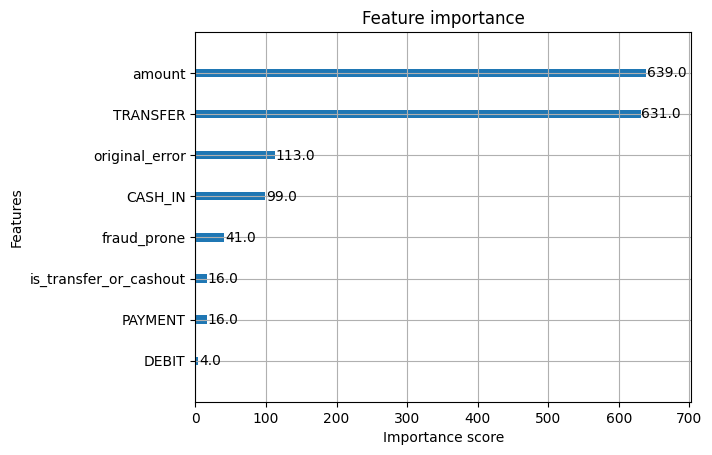

In [51]:
from xgboost import plot_importance

feature_names = [
    "amount",
    "isFraud",
    "CASH_IN",
    "CASH_OUT",
    "DEBIT",
    "PAYMENT",
    "TRANSFER",
    "original_error",
    "is_transfer_or_cashout",
    "fraud_prone",
    "transfer_high_amount"
]

ax=plot_importance(xgb)
feature_order= [t.get_text() for t in ax.get_yticklabels()]
mapping = {f"f{i}": name for i, name in enumerate(feature_names)}
ax.set_yticklabels([mapping.get(feat, feat) for feat in feature_order])
plt.show()

* From the above Importance Graph we can say that Transfer,amount, original_error  is our key main factors in determining weather a transaction is a fraud or Not a Fraud
* As we saw Earlier that Transfer has the most Fraud/Transactions we can safely say that our Model is Genralizing the fraud factor well.
* Our model actually learning the patterns

##### Let's Test Our Model!!!

In [52]:
fraud_samples = [
    {"amount": 250000, "CASH_IN": 0, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 1, "origin_error": 0, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 500000, "CASH_IN": 0, "CASH_OUT": 1, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 0, "origin_error": 0, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 220000, "CASH_IN": 0, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 1, "origin_error": 1, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 300000, "CASH_IN": 0, "CASH_OUT": 1, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 0, "origin_error": 1, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 450000, "CASH_IN": 0, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 1, "origin_error": 0, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 600000, "CASH_IN": 0, "CASH_OUT": 1, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 0, "origin_error": 2, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 275000, "CASH_IN": 0, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 1, "origin_error": 1, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 510000, "CASH_IN": 0, "CASH_OUT": 1, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 0, "origin_error": 0, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 230000, "CASH_IN": 0, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 1, "origin_error": 2, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1},
    {"amount": 700000, "CASH_IN": 0, "CASH_OUT": 1, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 0, "origin_error": 3, "is_transfer_or_cashout": 1, "fraud_prone": 1, "transfer_high_amount": 1}
]

X_samples = pd.DataFrame(fraud_samples)
y_proba = xgb.predict_proba(X_samples)[:, 1]
y_pred = xgb.predict(X_samples)

for i, (p, c) in enumerate(zip(y_proba, y_pred)):
    print(f"Sample Number {i} → Fraud Probability: {p:.2f}, Predicted: {c}")

Sample Number 0 → Fraud Probability: 0.94, Predicted: 1
Sample Number 1 → Fraud Probability: 0.94, Predicted: 1
Sample Number 2 → Fraud Probability: 0.95, Predicted: 1
Sample Number 3 → Fraud Probability: 0.95, Predicted: 1
Sample Number 4 → Fraud Probability: 0.94, Predicted: 1
Sample Number 5 → Fraud Probability: 0.95, Predicted: 1
Sample Number 6 → Fraud Probability: 0.95, Predicted: 1
Sample Number 7 → Fraud Probability: 0.94, Predicted: 1
Sample Number 8 → Fraud Probability: 0.95, Predicted: 1
Sample Number 9 → Fraud Probability: 0.95, Predicted: 1


In [53]:
nonfraud_samples = [
    {"amount": 1500, "CASH_IN": 1, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 0, "origin_error": 0, "is_transfer_or_cashout": 0, "fraud_prone": 0, "transfer_high_amount": 0},
    {"amount": 800, "CASH_IN": 0, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 1, "TRANSFER": 0, "origin_error": 0, "is_transfer_or_cashout": 0, "fraud_prone": 0, "transfer_high_amount": 0},
    {"amount": 5000, "CASH_IN": 0, "CASH_OUT": 0, "DEBIT": 1, "PAYMENT": 0, "TRANSFER": 0, "origin_error": 0, "is_transfer_or_cashout": 0, "fraud_prone": 0, "transfer_high_amount": 0},
    {"amount": 10000, "CASH_IN": 0, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 1, "TRANSFER": 0, "origin_error": 1, "is_transfer_or_cashout": 0, "fraud_prone": 0, "transfer_high_amount": 0},
    {"amount": 2000, "CASH_IN": 1, "CASH_OUT": 0, "DEBIT": 0, "PAYMENT": 0, "TRANSFER": 0, "origin_error": 0, "is_transfer_or_cashout": 0, "fraud_prone": 0, "transfer_high_amount": 0}
]

X_nsamples = pd.DataFrame(nonfraud_samples)
y_proba = xgb.predict_proba(X_nsamples)[:, 1]
y_pred = xgb.predict(X_nsamples)

for i, (p, c) in enumerate(zip(y_proba, y_pred)):
    print(f"Sample {i} → Fraud Probability: {p:.4f}, Predicted: {c}")

Sample 0 → Fraud Probability: 0.1783, Predicted: 0
Sample 1 → Fraud Probability: 0.1783, Predicted: 0
Sample 2 → Fraud Probability: 0.1783, Predicted: 0
Sample 3 → Fraud Probability: 0.2151, Predicted: 0
Sample 4 → Fraud Probability: 0.1783, Predicted: 0


In [54]:
data = [
    [5000,     0, 1, 0, 0, 0, 0, 0, 0, 0, 0],   
    [200000,   1, 0, 1, 0, 0, 0, 0, 1, 1, 1],   
    [750,      0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  
    [120000,   1, 0, 0, 0, 0, 1, 1, 1, 1, 1],  
    [1500,     0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
    [25000,    0, 0, 1, 0, 0, 0, 0, 1, 0, 0],   
    [500000,   1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [20000000,   1, 0, 1, 0, 0, 0, 1, 1, 1, 1],      
    [600,      0, 1, 0, 0, 0, 0, 0, 0, 0, 0],   
    [300000,   1, 0, 1, 0, 0, 0, 1, 1, 1, 1],   
    [900,      0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  
    [220000,   1, 0, 0, 0, 0, 1, 1, 1, 1, 1],  
    [1800,     0, 1, 0, 0, 0, 0, 0, 0, 0, 0],   
    [100000,   0, 0, 1, 0, 0, 0, 0, 1, 0, 0],   
    [400000,   1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
]

columns = [
    "amount","isFraud","CASH_IN","CASH_OUT","DEBIT","PAYMENT","TRANSFER",
    "original_error","is_transfer_or_cashout","fraud_prone","transfer_high_amount"
]

df_test= pd.DataFrame(data, columns=columns)
df_test

,amount,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,original_error,is_transfer_or_cashout,fraud_prone,transfer_high_amount
0,5000,0,1,0,0,0,0,0,0,0,0
1,200000,1,0,1,0,0,0,0,1,1,1
2,750,0,0,0,0,1,0,0,0,0,0
3,120000,1,0,0,0,0,1,1,1,1,1
4,1500,0,0,0,1,0,0,0,0,0,0
5,25000,0,0,1,0,0,0,0,1,0,0
6,500000,1,0,0,0,0,1,1,1,1,1
7,20000000,1,0,1,0,0,0,1,1,1,1
8,600,0,1,0,0,0,0,0,0,0,0
9,300000,1,0,1,0,0,0,1,1,1,1


In [55]:
xgb_test= df_test.drop('isFraud', axis=1)
xgb_predicts=xgb.predict(xgb_test)

print(xgb_predicts)

[0 1 0 1 0 1 1 1 0 1 0 1 0 1 1]


* Let's See How our Model Metrics Look Like on our unseen Test Data!!

In [56]:
model_test_x = df_test.drop("isFraud", axis=1)
model_test_y = df_test["isFraud"]            

model_pred_y = xgb.predict(model_test_x)


print("Confusion Matrix:")
print(confusion_matrix(model_test_y, model_pred_y))


print("\nClassification Report:")
print(classification_report(model_test_y, model_pred_y, digits=4))

Confusion Matrix:
[[6 2]
 [0 7]]

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.7500    0.8571         8
           1     0.7778    1.0000    0.8750         7

    accuracy                         0.8667        15
   macro avg     0.8889    0.8750    0.8661        15
weighted avg     0.8963    0.8667    0.8655        15



##### The classification report shows that the model correctly identified all fraudulent transactions (recall for fraud = 1.00), ensuring no fraud cases were missed, while 78% of its fraud predictions were accurate (precision for fraud = 0.78). For normal transactions, it predicted correctly 75% of the time, with a few false positives, leading to an overall accuracy of 86.7% ~ 87% and balanced F1-scores around 0.85. This indicates that the model is highly effective at detecting fraud, prioritizing recall to minimize missed frauds, while maintaining reasonable precision and overall reliability

In [57]:
#Let's Save our model executable

import pickle

try:
    with open('model_pickle.pkl', 'wb') as f:
        pickle.dump(xgb, f)
    print('Model Saved Successfully!')
except Exception as e:
    print(f'Error while saving the model: {e}')

Model Saved Successfully!
